In [ ]:
 from __future__ import absolute_import, division, print_function, unicode_literals

 try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import array_to_img, img_to_array, load_img

import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
import zipfile

#from google.colab import drive
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#!ls "gdrive/My Drive"

import zipfile
import pathlib

# root_directory = pathlib.Path('/content/gdrive/My Drive/art_classification2')
# print(root_directory)

# !ls "/content/gdrive/My Drive/art_classification2/train2"
# print()
# !ls "/content/gdrive/My Drive/art_classification2/test2"

# train_dir = pathlib.Path(root_directory, 'train2')
# print(train_dir)

# test_dir = pathlib.Path(root_directory, 'test2')
# print(test_dir)


#root_directory = pathlib.Path('/content/gdrive/My Drive/art_semi')

#root_directory = pathlib.Path('/content/gdrive/My Drive/testcase1')
root_directory = pathlib.Path('/content/gdrive/My Drive/testcase2')
#root_directory = pathlib.Path('/content/gdrive/My Drive/testcase3')
#root_directory = pathlib.Path('/content/gdrive/My Drive/testcase4')



print(root_directory)

#!ls "/content/gdrive/My Drive/art_semi/train1"
!ls "/content/gdrive/My Drive/testcase2"
print()
#!ls "/content/gdrive/My Drive/art_semi/test1"
!ls "/content/gdrive/My Drive/testcase1/test1"

train_dir = pathlib.Path(root_directory, 'train1')
print(train_dir)

test_dir = pathlib.Path(root_directory, 'test1')
print(test_dir)

train_image_count = len(list(train_dir.glob('*/*.jpg')))
print(train_image_count)

test_image_count = len(list(test_dir.glob('*/*.jpg')))
print(test_image_count)

/content/gdrive/My Drive/testcase2
test1  train1  train_more  validation

abstracticism  baroque	impressionism  minimalism  popart
/content/gdrive/My Drive/testcase2/train1
/content/gdrive/My Drive/testcase2/test1
400
125


In [ ]:
train_left_dir = os.path.join(root_directory, 'train_more')
os.mkdir(train_left_dir)

left_minimalism_dir = os.path.join(train_left_dir, 'minimalism')
os.mkdir(left_minimalism_dir)

left_popart_dir = os.path.join(train_left_dir, 'popart')
os.mkdir(left_popart_dir)


FileExistsError: ignored

In [ ]:
!ls "/content/gdrive/My Drive/testcase2/train_more"

minimalism  popart


In [ ]:
# _URL4 = 'https://drive.google.com/uc?export=download&id=131gsru6u-jq2BXa_SjW5Y35Lomt7P4A2'
# #only three categories

# path_to_zip = tf.keras.utils.get_file("art_semi.zip", origin=_URL4, extract=True)

# PATH = os.path.join(os.path.dirname(path_to_zip), 'art_semi')

# print(path_to_zip)
# print(PATH)

# train_dir = os.path.join(PATH, 'train1')

# print(train_dir)

# test_dir = os.path.join(PATH, 'test1')

# print(test_dir)

In [ ]:
train_abstractionism_dir = pathlib.Path(train_dir, 'abstracticism')
print(train_abstractionism_dir)
test_abstractionism_dir = pathlib.Path(test_dir, 'abstracticism')
print(test_abstractionism_dir)

train_baroque_dir = pathlib.Path(train_dir, 'baroque')
print(train_baroque_dir)
test_baroque_dir = pathlib.Path(test_dir, 'baroque')
print(test_baroque_dir)

train_impressionism_dir = os.path.join(train_dir, 'impressionism')
print(train_impressionism_dir)
test_impressionism_dir = os.path.join(test_dir, 'impressionism')
print(test_impressionism_dir)

train_minimalism_dir = os.path.join(train_dir, 'minimalism')
print(train_minimalism_dir)
test_minimalism_dir = os.path.join(test_dir, 'minimalism')
print(test_minimalism_dir)

train_popart_dir = pathlib.Path(train_dir, 'popart')
print(train_popart_dir)
test_popart_dir = pathlib.Path(test_dir, 'popart')
print(test_popart_dir)

/content/gdrive/My Drive/testcase2/train1/abstracticism
/content/gdrive/My Drive/testcase2/test1/abstracticism
/content/gdrive/My Drive/testcase2/train1/baroque
/content/gdrive/My Drive/testcase2/test1/baroque
/content/gdrive/My Drive/testcase2/train1/impressionism
/content/gdrive/My Drive/testcase2/test1/impressionism
/content/gdrive/My Drive/testcase2/train1/minimalism
/content/gdrive/My Drive/testcase2/test1/minimalism
/content/gdrive/My Drive/testcase2/train1/popart
/content/gdrive/My Drive/testcase2/test1/popart


In [ ]:
CLASS_NAMES = np.array([item.name for item in test_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES
print()
print(CLASS_NAMES)


['minimalism' 'impressionism' 'abstracticism' 'popart' 'baroque']


In [ ]:
num_abstractionism_tr = len(os.listdir(train_abstractionism_dir))
print('train abstractionism num:', num_abstractionism_tr)
num_abstractionism_tt = len(os.listdir(test_abstractionism_dir))
print('test abstractionism num: ', num_abstractionism_tt)

num_baroque_tr = len(os.listdir(train_baroque_dir))
print('train baroque num: ', num_baroque_tr)
num_baroque_tt = len(os.listdir(test_baroque_dir))
print('test baroque num: ', num_baroque_tt)

num_impressionism_tr = len(os.listdir(train_impressionism_dir))
print('train impressionism num: ', num_impressionism_tr)
num_impressionism_tt = len(os.listdir(test_impressionism_dir))
print('test impressionism num: ', num_impressionism_tt)

num_minimalism_tr = len(os.listdir(train_minimalism_dir))
print('train minimalism num: ', num_minimalism_tr)
num_minimalism_tt = len(os.listdir(test_minimalism_dir))
print('test minimalism num: ', num_minimalism_tt)

num_popart_tr = len(os.listdir(train_popart_dir))
print('train popart num: ', num_popart_tr)
num_popart_tt = len(os.listdir(test_popart_dir))
print('test popart num: ', num_popart_tt)

total_train = num_abstractionism_tr + num_baroque_tr + num_impressionism_tr + num_minimalism_tr + num_popart_tr
total_test = num_abstractionism_tt + num_baroque_tt + num_impressionism_tt + num_minimalism_tt + num_popart_tt
print('total training datatset: ', total_train)
print('total test dataset: ', total_test)


train abstractionism num: 50
test abstractionism num:  25
train baroque num:  50
test baroque num:  25
train impressionism num:  50
test impressionism num:  25
train minimalism num:  81
test minimalism num:  25
train popart num:  81
test popart num:  25
total training datatset:  312
total test dataset:  125


In [ ]:
import shutil

fnames = ['minimalism.{}.jpg'.format(i) for i in range(81, 125)]
for fname in fnames:
  src = os.path.join(train_minimalism_dir, fname)
  dst = os.path.join(left_minimalism_dir, fname)
  shutil.move(src, dst)

fnames = ['popart.{}.jpg'.format(i) for i in range(81, 125)]
for fname in fnames:
  src = os.path.join(train_popart_dir, fname)
  dst = os.path.join(left_popart_dir, fname)
  shutil.move(src, dst)

In [ ]:
# num_abstractionism_tr = len(os.listdir(train_abstractionism_dir))
# print('total training abstractionism images:', num_abstractionism_tr)
# num_abstractionism_tt = len(os.listdir(test_abstractionism_dir))
# print('total test abstractionism images: ', num_abstractionism_tt)

# num_baroque_tr = len(os.listdir(train_baroque_dir))
# print('train baroque num: ', num_baroque_tr)
# num_baroque_tt = len(os.listdir(test_baroque_dir))
# print('test baroque num: ', num_baroque_tt)

# num_cubism_tr = len(os.listdir(train_cubism_dir))
# print('train cubism num: ', num_cubism_tr)
# num_cubism_tt = len(os.listdir(test_cubism_dir))
# print('test cubism num: ', num_cubism_tt)

# num_expressionism_tr = len(os.listdir(train_expressionism_dir))
# print('train expressionism num: ', num_expressionism_tr)
# num_expressionism_tt = len(os.listdir(test_expressionism_dir))
# print('test expressionism num: ', num_expressionism_tt)

# num_impressionism_tr = len(os.listdir(train_impressionism_dir))
# print('train impressionism num: ', num_impressionism_tr)
# num_impressionism_tt = len(os.listdir(test_impressionism_dir))
# print('test impressionism num: ', num_impressionism_tt)

# num_neoclassicism_tr = len(os.listdir(train_neoclassicism_dir))
# print('train neoclassicism num: ', num_neoclassicism_tr)
# num_neoclassicism_tt = len(os.listdir(test_neoclassicism_dir))
# print('test neoclassicism num: ', num_neoclassicism_tt)

# num_northernrenaissance_tr = len(os.listdir(train_northernrenaissance_dir))
# print('train northernrenaissance num: ', num_northernrenaissance_tr)
# num_northernrenaissance_tt = len(os.listdir(test_northernrenaissance_dir))
# print('test northernrenaissance num: ', num_northernrenaissance_tt)

# num_realism_tr = len(os.listdir(train_realism_dir))
# print('train realism num: ', num_realism_tr)
# num_realism_tt = len(os.listdir(test_realism_dir))
# print('test realism num: ', num_realism_tt)

# num_romanticism_tr = len(os.listdir(train_romanticism_dir))
# print('train romanticism num: ', num_romanticism_tr)
# num_romanticism_tt = len(os.listdir(test_romanticism_dir))
# print('test romanticism num: ', num_romanticism_tt)

# num_surrealism_tr = len(os.listdir(train_surrealism_dir))
# print('train surrealism num: ', num_surrealism_tr)
# num_surrealism_tt = len(os.listdir(test_surrealism_dir))
# print('test surrealism num: ', num_surrealism_tt)

# num_symbolism_tr = len(os.listdir(train_symbolism_dir))
# print('train symbolism num: ', num_symbolism_tr)
# num_symbolism_tt = len(os.listdir(test_symbolism_dir))
# print('test symbolism num: ', num_symbolism_tt)


# total_train = (num_abstractionism_tr + num_baroque_tr + num_cubism_tr + num_expressionism_tr + num_impressionism_tr + 
#               num_neoclassicism_tr + num_northernrenaissance_tr + num_realism_tr + num_romanticism_tr + num_surrealism_tr + num_symbolism_tr)
# total_test = (num_abstractionism_tt + num_baroque_tt + num_cubism_tt + num_expressionism_tt + num_impressionism_tt + 
#               num_neoclassicism_tt + num_northernrenaissance_tt + num_realism_tt + num_romanticism_tt + num_surrealism_tt + num_symbolism_tt)

# print('total training datatset: ', total_train)
# print('total test dataset: ', total_test)


In [ ]:
batch_size = 50
epochs = 15
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

print(train_image_generator)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                          class_mode='categorical')

print(train_data_gen.image_shape)

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

len(test_data_gen)
print(test_data_gen.image_shape)

Found 312 images belonging to 5 classes.
(200, 200, 3)
Found 125 images belonging to 5 classes.
(200, 200, 3)


In [ ]:
#sample_training_images, _ = next(train_data_gen)
#sample_test_images, _ = next(test_data_gen)

sample_training_images, sample_training_labels = next(train_data_gen)
sample_test_images, sample_test_labels = next(test_data_gen)

#print(sample_training_labels)
#print(sample_test_labels)
#for i in sample_training_labels:
#  a = sample_training_labels[i]
#  print(a)

print(sample_test_images.shape)
print(sample_test_labels.shape)
print(sample_test_images.size)
print(sample_test_labels.size)

print(sample_training_images.shape)
print(sample_training_labels.shape)
print(sample_training_images.size)
print(sample_training_labels.size)

def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, lbl, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.set_xlabel(CLASS_NAMES[int(lbl)])
        #ax.axis('off')
    plt.tight_layout()
    plt.show()


# print('sample_training_images[:10]')
# plotImages(sample_training_images[:10], sample_training_labels[:10])

# print('sample_test_images[:10]')
# plotImages(sample_test_images[:10], sample_test_labels[:10])


(55, 200, 200, 3)
(55, 5)
6600000
275
(55, 200, 200, 3)
(55, 5)
6600000
275


In [ ]:

model = Sequential([
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding='valid', activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding='valid', activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(), 
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])


In [ ]:
'''
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), padding='valid', activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), padding='valid', activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(), 
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])
'''

In [ ]:
#model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 64)       

In [ ]:
#history = model.fit_generator(train_data_gen, steps_per_epoch= total_train // batch_size, epochs=epochs,
#    validation_data=test_data_gen, validation_steps=total_test // batch_size)

In [ ]:
history = model.fit(train_data_gen, epochs = epochs, batch_size=batch_size, steps_per_epoch= total_train//batch_size )

Epoch 1/15
6/6 [==============================] - 10s 2s/step - loss: 1.5945 - accuracy: 0.2100
Epoch 2/15
6/6 [==============================] - 10s 2s/step - loss: 1.5039 - accuracy: 0.3664
Epoch 3/15
6/6 [==============================] - 9s 1s/step - loss: 1.4716 - accuracy: 0.4313
Epoch 4/15
6/6 [==============================] - 8s 1s/step - loss: 1.3940 - accuracy: 0.4733
Epoch 5/15
6/6 [==============================] - 8s 1s/step - loss: 1.4088 - accuracy: 0.4618
Epoch 6/15
6/6 [==============================] - 8s 1s/step - loss: 1.3206 - accuracy: 0.5878
Epoch 7/15
6/6 [==============================] - 8s 1s/step - loss: 1.3232 - accuracy: 0.6450
Epoch 8/15
6/6 [==============================] - 10s 2s/step - loss: 1.2664 - accuracy: 0.6533
Epoch 9/15
6/6 [==============================] - 10s 2s/step - loss: 1.2643 - accuracy: 0.6260
Epoch 10/15
6/6 [==============================] - 9s 1s/step - loss: 1.2009 - accuracy: 0.7023
Epoch 11/15
6/6 [============================

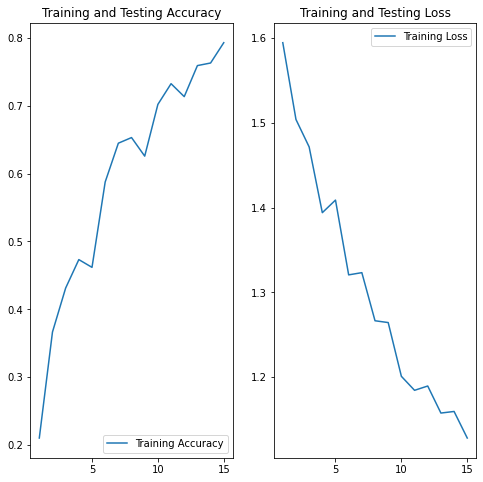

In [ ]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss=history.history['loss']
#val_loss=history.history['val_loss']

#epochs_range = range(epochs)
epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_data_gen, steps = 50)
print(test_acc)

0.6966666579246521


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#predictions = model.predict(test_data_gen)
predictions = model.predict_generator(test_data_gen, total_test // batch_size+1)
print(predictions.size)
y_pred = np.argmax(predictions, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_data_gen.classes, y_pred))
print('Classification Report')

print(classification_report(test_data_gen.classes, y_pred, target_names=CLASS_NAMES))

print('\nPredicted class for test image 0: ', np.argmax(predictions[0]), CLASS_NAMES[np.argmax(predictions[0])])
#print('Actual classification for the test image: ', int(test_data_gen[0]), CLASS_NAMES[int(test_data_gen[0])])

Instructions for updating:
Please use Model.predict, which supports generators.
625
Confusion Matrix
[[15  1  4  1  4]
 [ 3 14  8  0  0]
 [ 3  1 19  1  1]
 [ 0  0  2 23  0]
 [ 5  0  3  1 16]]
Classification Report
               precision    recall  f1-score   support

   minimalism       0.58      0.60      0.59        25
impressionism       0.88      0.56      0.68        25
abstracticism       0.53      0.76      0.62        25
       popart       0.88      0.92      0.90        25
      baroque       0.76      0.64      0.70        25

     accuracy                           0.70       125
    macro avg       0.73      0.70      0.70       125
 weighted avg       0.73      0.70      0.70       125


Predicted class for test image 0:  0 minimalism


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = cm*100
    print('\nNormalized Confusion Matrix')
  else: 
    print('\nConfusion Matrix, without Normalization')
   
  print(cm)
  print()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)


  fmt = '.0f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


Confusion Matrix, without Normalization
[[15  1  4  1  4]
 [ 3 14  8  0  0]
 [ 3  1 19  1  1]
 [ 0  0  2 23  0]
 [ 5  0  3  1 16]]



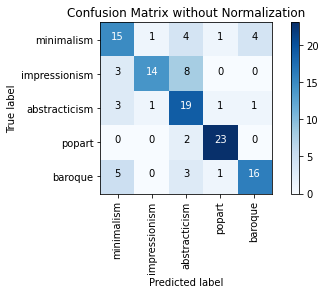

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred = np.argmax(predictions, axis = 1)

cnf_matrix = confusion_matrix(test_data_gen.classes, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CLASS_NAMES, title ='Confusion Matrix without Normalization')

#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=CLASS_NAMES, normalize=True, title='Confusion Matrix with Normalization')

In [ ]:
 ef plotImages2(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

1) Apply horizontal flip
2) Randomly rotate the image
3) Apply zoom augmentation

Found 186 images belonging to 3 classes.


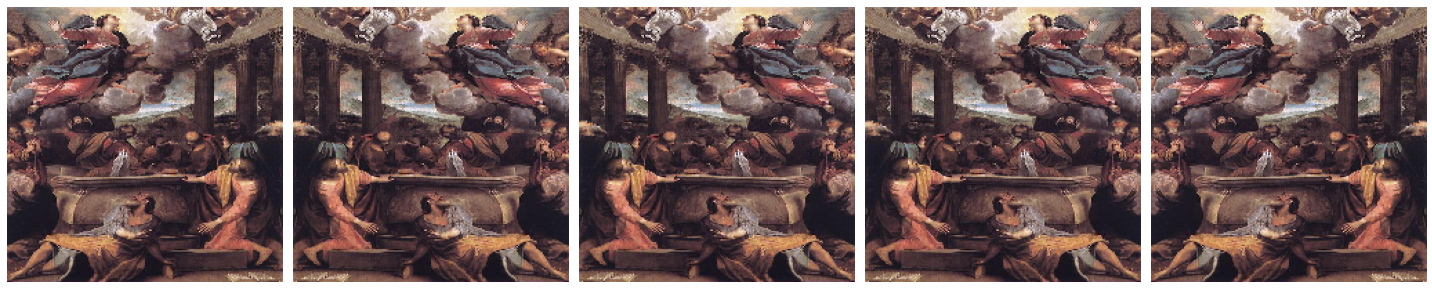

In [ ]:

# Horizontal Flip
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages2(augmented_images)

Found 186 images belonging to 3 classes.


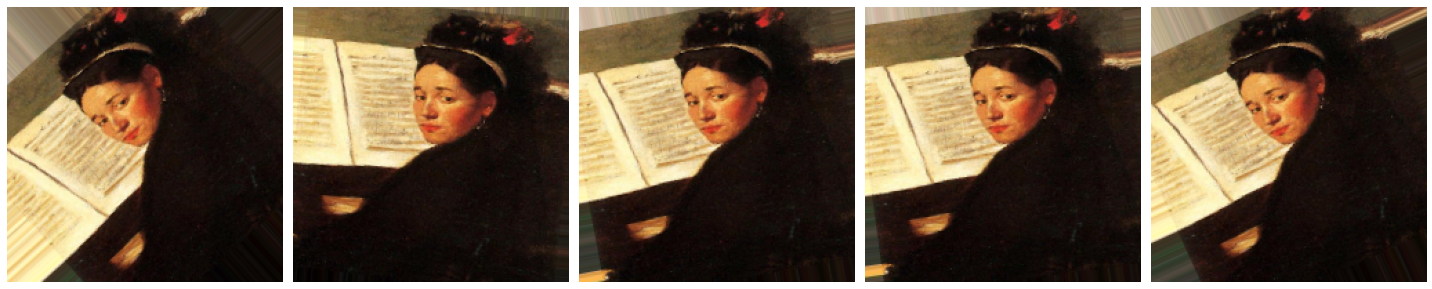

In [ ]:
# Randomly rotate the image
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages2(augmented_images)

Found 186 images belonging to 3 classes.


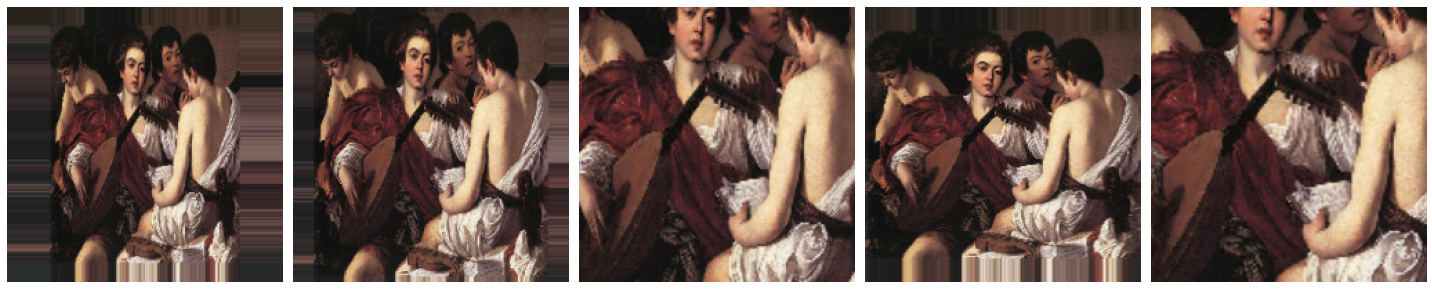

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) 

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages2(augmented_images)

Found 186 images belonging to 3 classes.


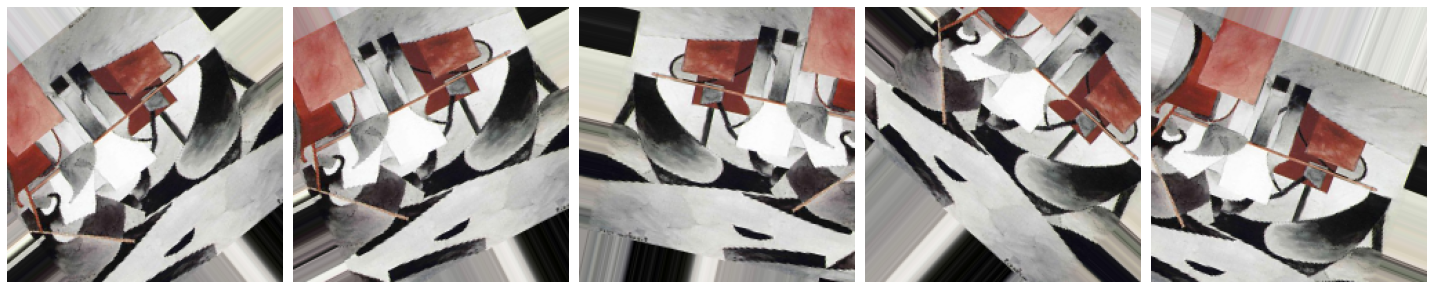

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages2(augmented_images)

In [ ]:
# for the validation data
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 71 images belonging to 3 classes.


In [ ]:
model_new = Sequential([
    Conv2D(16, (3,3), padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 64)       

In [ ]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_test // batch_size
)

Epoch 1/15
3/3 [==============================] - 7s 2s/step - loss: 1.2338 - accuracy: 0.3000 - val_loss: 1.1514 - val_accuracy: 0.4000
Epoch 2/15
3/3 [==============================] - 6s 2s/step - loss: 1.2629 - accuracy: 0.2868 - val_loss: 1.1914 - val_accuracy: 0.3600
Epoch 3/15
3/3 [==============================] - 6s 2s/step - loss: 1.1514 - accuracy: 0.3897 - val_loss: 1.2314 - val_accuracy: 0.3200
Epoch 4/15
3/3 [==============================] - 6s 2s/step - loss: 1.2681 - accuracy: 0.2868 - val_loss: 1.1314 - val_accuracy: 0.4200
Epoch 5/15
3/3 [==============================] - 6s 2s/step - loss: 1.2248 - accuracy: 0.3267 - val_loss: 1.1714 - val_accuracy: 0.3800
Epoch 6/15
3/3 [==============================] - 6s 2s/step - loss: 1.2363 - accuracy: 0.3162 - val_loss: 1.1314 - val_accuracy: 0.4200
Epoch 7/15
3/3 [==============================] - 6s 2s/step - loss: 1.2189 - accuracy: 0.3382 - val_loss: 1.2114 - val_accuracy: 0.3400
Epoch 8/15
3/3 [=========================